<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/Support_Vector_Machine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls '/content/drive/MyDrive/py-master/ML/10_svm/'

10_svm.ipynb  Exercise	iris_petal_sepal.png


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()
df

In [21]:
dir(df)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [22]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
df1= pd.DataFrame(df.data,columns=df.feature_names)

In [24]:
df1['Target']=df.target
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
df1.shape

(150, 5)

In [30]:
df1['flower_name']= df1.Target.apply(lambda x: df.target_names[x])

In [31]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


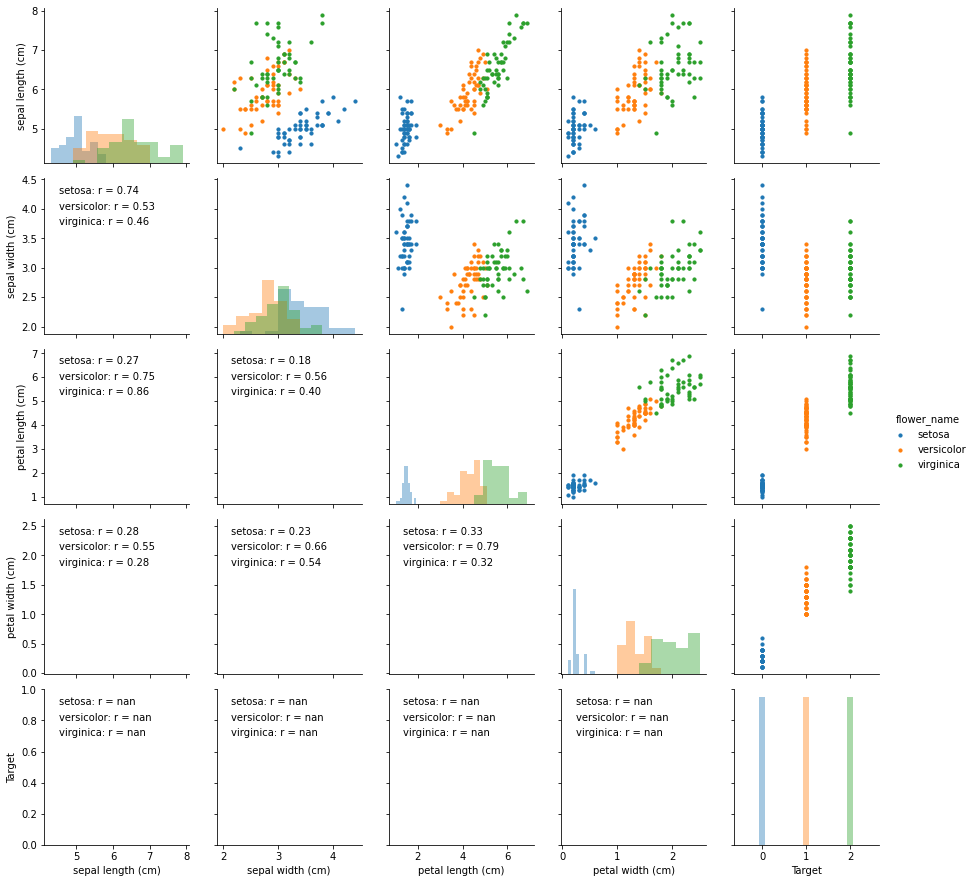

In [51]:
from scipy import stats
import seaborn as sns
import matplotlib

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    # count how many annotations are already present
    n = len([c for c in ax.get_children() if 
                  isinstance(c, matplotlib.text.Annotation)])
    pos = (.1, .9 - .1*n)
    
    ax.annotate("{}: r = {:.2f}".format(kws['label'],r),
                xy=pos, xycoords=ax.transAxes)


g = sns.PairGrid(data = df1, hue="flower_name")
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(corrfunc)
g.add_legend()

In [60]:
from sklearn.model_selection import train_test_split
x = df1.drop(['Target','flower_name'],axis=1)
y=df1.Target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
len(xtest)

30

In [57]:
from sklearn.svm import SVC

In [62]:
model = SVC()

model.fit(xtrain,ytrain)
model.score(xtest,ytest)


0.9666666666666667

In [63]:
from sklearn.metrics import confusion_matrix
ypred= model.predict(xtest)
cm = confusion_matrix(ypred, ytest)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])